# Forecasting of NVIDIA Stock Data Analysis

## Import

### Import libraries

In [29]:
## For Data Management
import pandas as pd
import numpy as np

## For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## For Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose

## For Web Scrapping
import yfinance as yf

## For Forecasting
import datetime as dt
from datetime import timedelta, date
import plotly.graph_objects as ga
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import statsmodels.api as sm
import warnings

### Import Dataset

In [30]:
date.today()

datetime.date(2024, 7, 11)

In [31]:
today = date.today()
d1 = today.strftime('%Y-%m-%d')
end_date = d1

d2 = date.today() - timedelta(days=730)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2

print('Data is starts from ', start_date,' to ', end_date)

Data is starts from  2022-07-12  to  2024-07-11


In [32]:
ticker = 'NVDA'

df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-12,15.268,15.431000,14.877000,15.082,15.065034,458483000
2022-07-13,14.590,15.375000,14.465000,15.164,15.146940,521918000
2022-07-14,15.108,15.473000,14.728000,15.372,15.354708,456235000
2022-07-15,15.659,15.782000,15.445000,15.762,15.744269,385935000
2022-07-18,16.302,16.896999,16.002001,16.101,16.082886,670517000


## EDA

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-07-12 to 2024-07-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       502 non-null    float64
 1   High       502 non-null    float64
 2   Low        502 non-null    float64
 3   Close      502 non-null    float64
 4   Adj Close  502 non-null    float64
 5   Volume     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


In [34]:
df.insert(0, 'Date', df.index, True)
#df['Date'] = df.index               ### Another way to add date column in Dataset
df.reset_index(drop=True, inplace=True) 

In [35]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
497,2024-07-03,121.660004,128.279999,121.360001,128.279999,128.279999,215749000
498,2024-07-05,127.379997,128.850006,125.680000,125.830002,125.830002,214176700
499,2024-07-08,127.489998,130.770004,127.040001,128.199997,128.199997,237677300
500,2024-07-09,130.350006,133.820007,128.649994,131.380005,131.380005,285366600
501,2024-07-10,134.029999,135.100006,132.419998,134.910004,134.910004,247760000


In [36]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-12,15.268,15.431000,14.877000,15.082,15.065034,458483000
1,2022-07-13,14.590,15.375000,14.465000,15.164,15.146940,521918000
2,2022-07-14,15.108,15.473000,14.728000,15.372,15.354708,456235000
3,2022-07-15,15.659,15.782000,15.445000,15.762,15.744269,385935000
4,2022-07-18,16.302,16.896999,16.002001,16.101,16.082886,670517000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       502 non-null    datetime64[ns]
 1   Open       502 non-null    float64       
 2   High       502 non-null    float64       
 3   Low        502 non-null    float64       
 4   Close      502 non-null    float64       
 5   Adj Close  502 non-null    float64       
 6   Volume     502 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.6 KB


In [38]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,502,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,2023-07-09 16:21:02.151394304,45.086986,45.914245,44.261102,45.165261,45.154702,4.878404e+08
min,2022-07-12 00:00:00,10.971000,11.735000,10.813000,11.227000,11.217704,1.679340e+08
25%,2023-01-09 06:00:00,18.182499,18.804001,17.962249,18.462250,18.441482,3.881962e+08
50%,2023-07-11 12:00:00,41.945499,42.809999,41.423500,42.202499,42.191607,4.592545e+08
75%,2024-01-08 18:00:00,51.854751,53.812501,51.137249,52.918249,52.911422,5.534245e+08
max,2024-07-10 00:00:00,139.800003,140.759995,132.419998,135.580002,135.580002,1.543911e+09
std,NaN,30.867731,31.432128,30.229396,30.894662,30.897180,1.570150e+08


In [39]:
fig  = px.line(df, x='Date', y=df.columns, title='NVIDIA Stock Price ')
fig.show()

In [40]:
df = df[['Date', 'Open']]
df.head()   

,Date,Open
0,2022-07-12,15.268
1,2022-07-13,14.590
2,2022-07-14,15.108
3,2022-07-15,15.659
4,2022-07-18,16.302


In [41]:
fig  = px.line(df, x='Date', y='Open', title='NVIDIA Stock Price ')
fig.show()
df.describe()

,Date,Open
count,502,502.000000
mean,2023-07-09 16:21:02.151394304,45.086986
min,2022-07-12 00:00:00,10.971000
25%,2023-01-09 06:00:00,18.182499
50%,2023-07-11 12:00:00,41.945499
75%,2024-01-08 18:00:00,51.854751
max,2024-07-10 00:00:00,139.800003
std,NaN,30.867731


### ChecKing data Stationarity 

In [42]:
def adf_test(df):
    result = adfuller(df)
    print(f'ADF Statistics : {result[0]}')
    print(f'p-value : {result[1]} ')
    if result[1]<= 0.05:
        print('Reject Null Hypothesis, Data is Stationary. We can use ARIMA Model')
    else:
        print('Fail to Reject Null Hypothesis, Data is not Stationarity. We cannot use ARIMA Model')
adf_test(df['Date'])

ADF Statistics : 9.419946853376674
p-value : 1.0 
Fail to Reject Null Hypothesis, Data is not Stationarity. We cannot use ARIMA Model


### Seasonal Decomposition

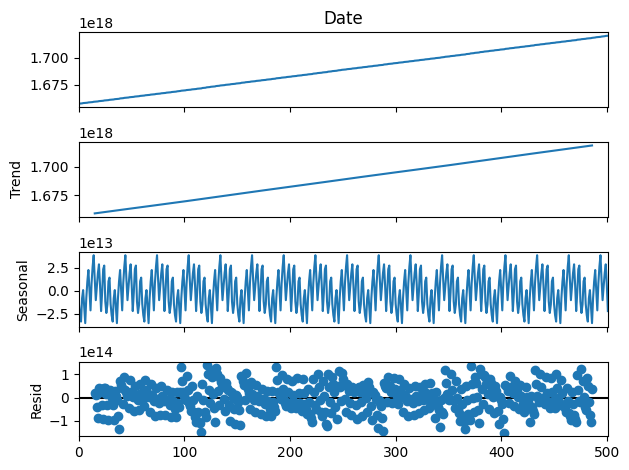

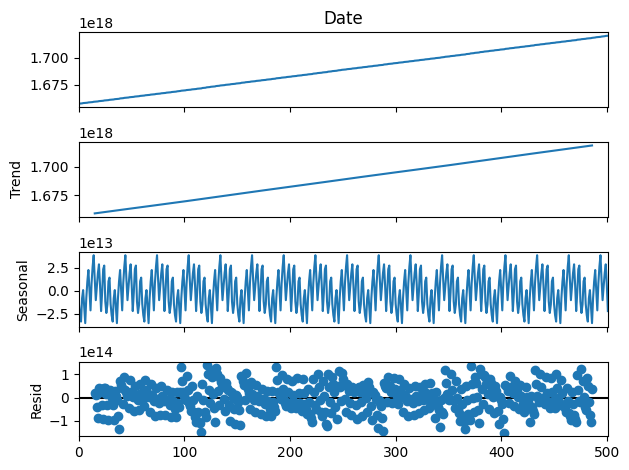

In [43]:
decompose = seasonal_decompose(df['Date'], model='additive', period=30)
decompose.plot()

### Find d value

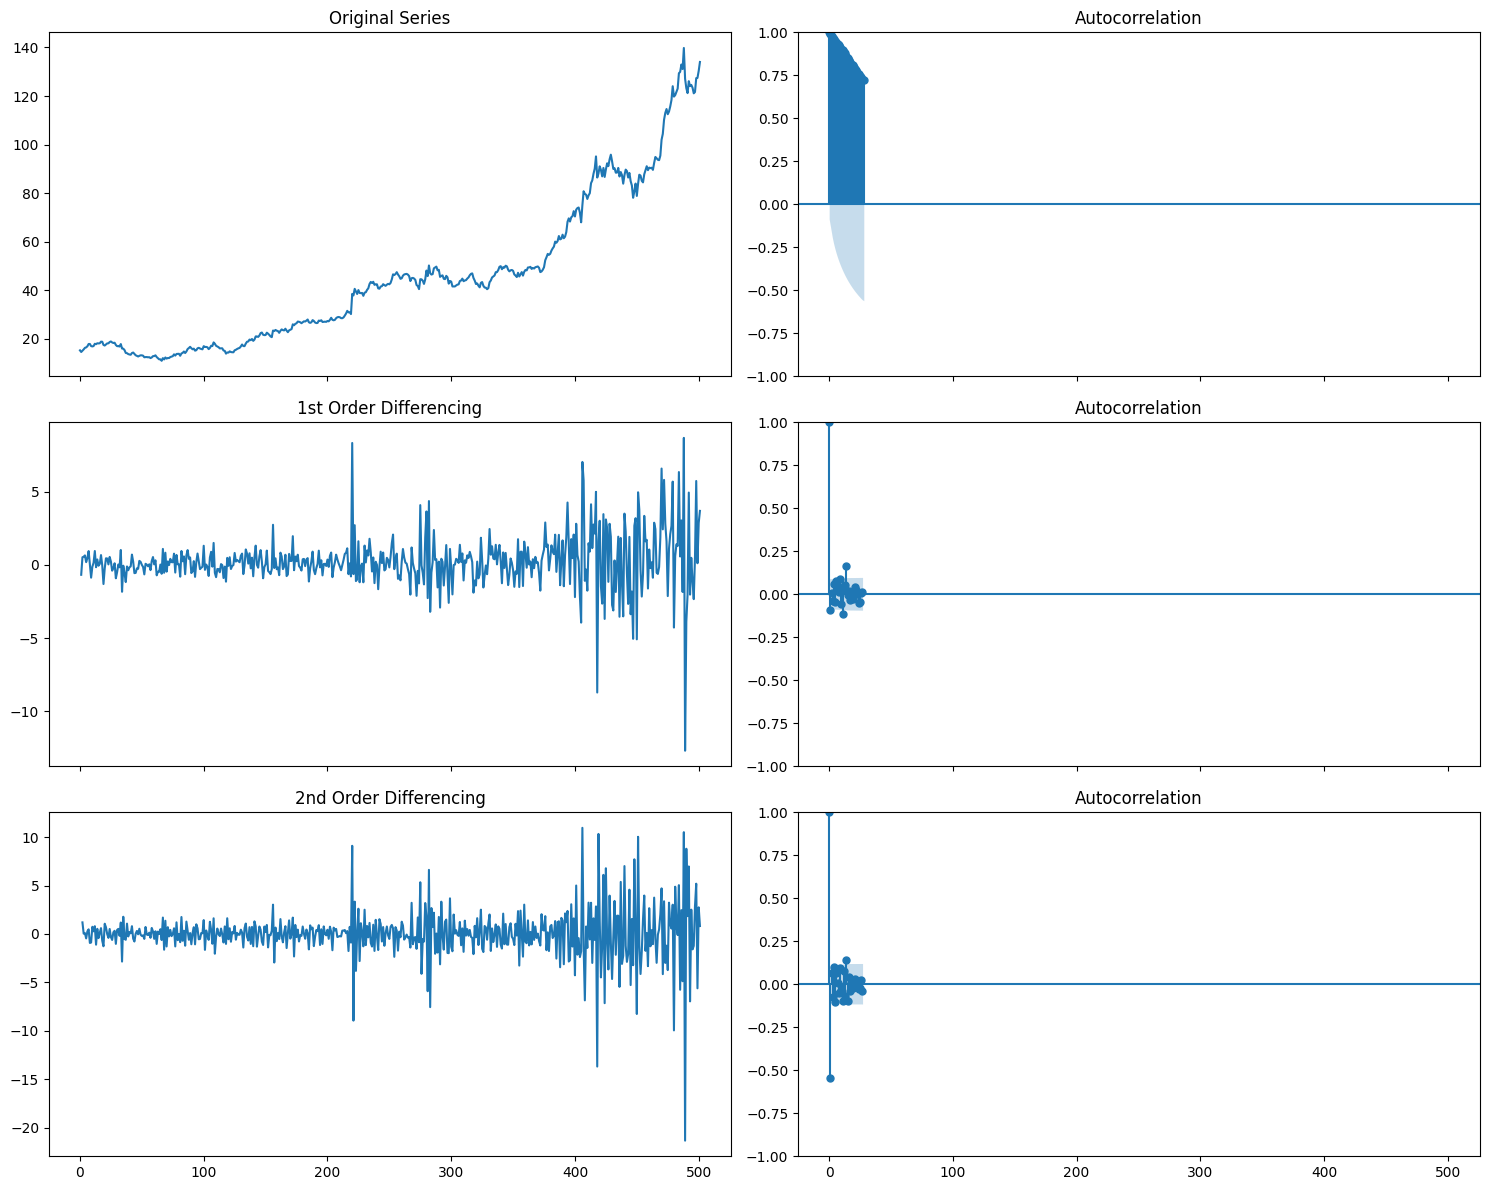

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True)

# Original Series
axes[0, 0].plot(df['Open'])
axes[0, 0].set_title('Original Series')
plot_acf(df['Open'], ax=axes[0, 1])

# First Differencing
first_diff = df['Open'].diff().dropna()
axes[1, 0].plot(first_diff)
axes[1, 0].set_title('1st Order Differencing')
plot_acf(first_diff, ax=axes[1, 1])

# Second Differencing
second_diff = first_diff.diff().dropna()
axes[2, 0].plot(second_diff)
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(second_diff, ax=axes[2, 1])

plt.tight_layout()
plt.show()


d = 2

### Find p-value

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

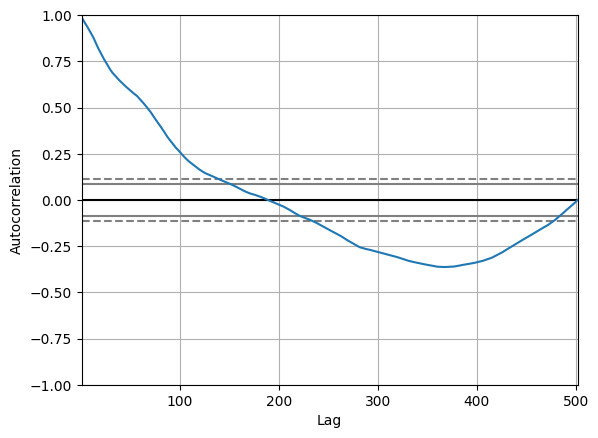

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(df['Open'])

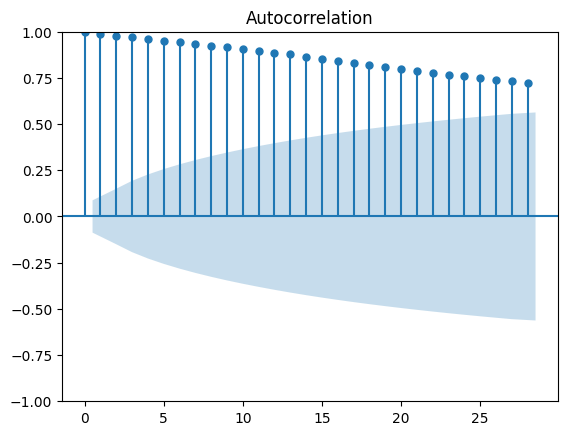

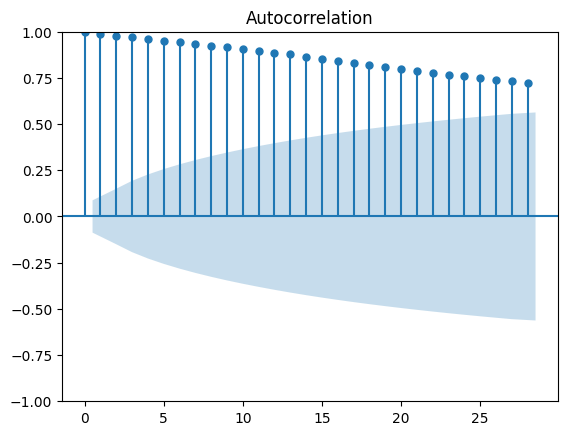

In [46]:
plot_acf(df['Open'], alpha=0.05)

In [47]:
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Open']))
print(x_acf)

           0
0   1.000000
1   0.989135
2   0.979149
3   0.969653
4   0.960284
5   0.951773
6   0.943470
7   0.934460
8   0.925085
9   0.915709
10  0.905558
11  0.896452
12  0.887289
13  0.877261
14  0.864615
15  0.853006
16  0.841012
17  0.829458
18  0.818102
19  0.807927
20  0.797939
21  0.788091
22  0.778185
23  0.767380
24  0.757568
25  0.748405
26  0.739749
27  0.731191


p = 6

### Find q value

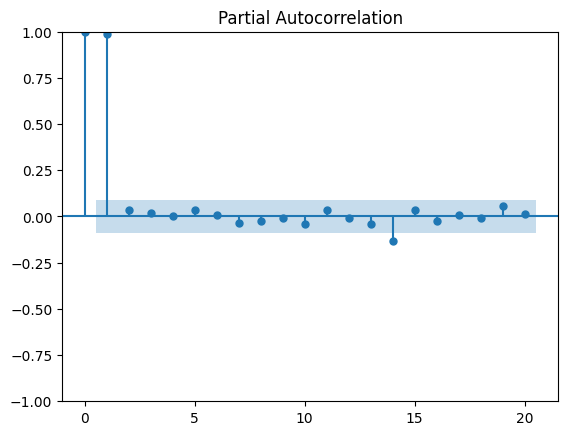

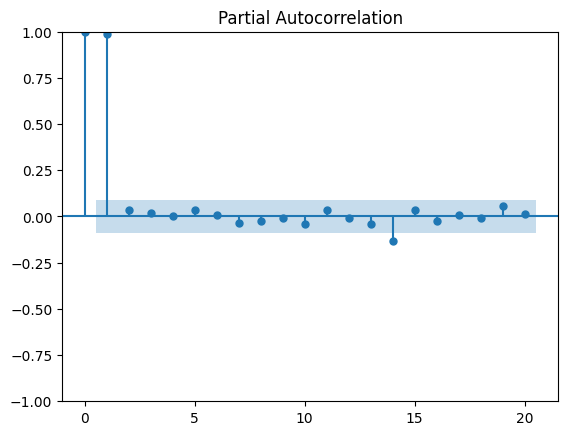

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df['Open'],  lags=20, alpha=0.05)

q = 2

## Forecasting

In [49]:
q = 2
p = 6
d = 2

### Auto_Arima 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  502
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -990.305
Date:                Thu, 11 Jul 2024   AIC                           1986.609
Time:                        11:27:34   BIC                           1999.253
Sample:                             0   HQIC                          1991.571
                                - 502                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0952      0.022    -49.614      0.000      -1.139      -1.052
ma.L2          0.1079      0.023      4.718      0.000       0.063       0.153
sigma2         3.0518      0.093     32.841      0.0

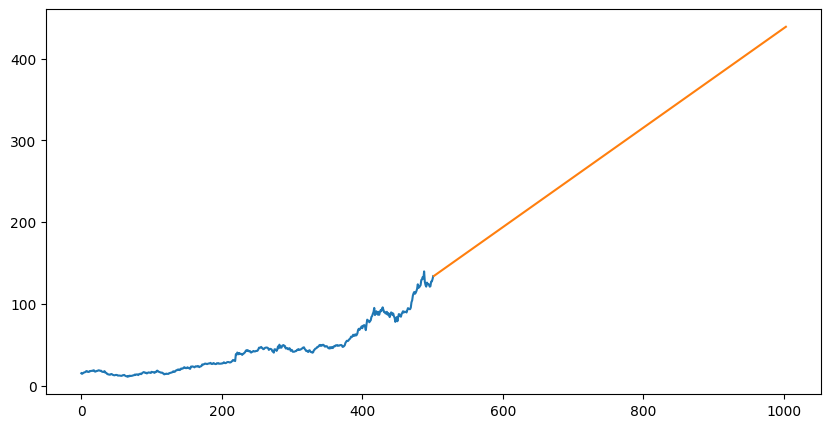

In [50]:
model = auto_arima(df['Open'], seasonal=True, suppress_warnings=True)
print(model.summary())

# Predict Forecast
forecast = model.predict(len(df['Open']), len(df['Open'])+30 )
print(forecast)

# Plot the forecast
plt.figure(figsize=[10, 5])
plt.plot(df['Open'], label='Actual')
plt.plot(forecast, label='Predicted')

### SARIMAX fitting

In [51]:
p,d, q = 6,2,2
model =sm.tsa.statespace.SARIMAX(df['Open'],
                                  order=(p,d,q), 
                                  seasonal_order=(p,d,q, 12))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\Faizan\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                               Open   No. Observations:                  502
Model:             SARIMAX(6, 2, 2)x(6, 2, 2, 12)   Log Likelihood               -1005.312
Date:                            Thu, 11 Jul 2024   AIC                           2044.625
Time:                                    11:43:10   BIC                           2115.437
Sample:                                         0   HQIC                          2072.469
                                            - 502                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0950      0.301     -3.638      0.000      -1.685      -0.505
ar.L2         -0.0908      0.057   

### Predictions

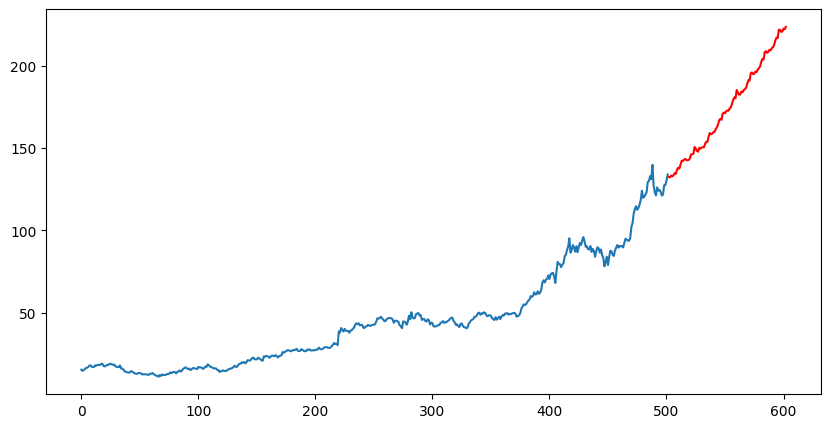

In [56]:
predictions = model_fit.predict(start=len(df['Open']), end=len(df['Open'])+100)

# Plot the forecast
plt.figure(figsize=[10, 5])
plt.plot(df['Open'], label='Actual')
plt.plot(predictions, color='red', label='Predicted')


In [57]:
predictions = model_fit.predict(start=len(df['Open']), end=len(df['Open'])+10)
print(predictions)

502    132.508970
503    132.184160
504    133.334777
505    132.794224
506    133.519021
507    134.747368
508    134.356524
509    136.896683
510    138.075336
511    137.535912
512    139.970004
Name: predicted_mean, dtype: float64
